{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

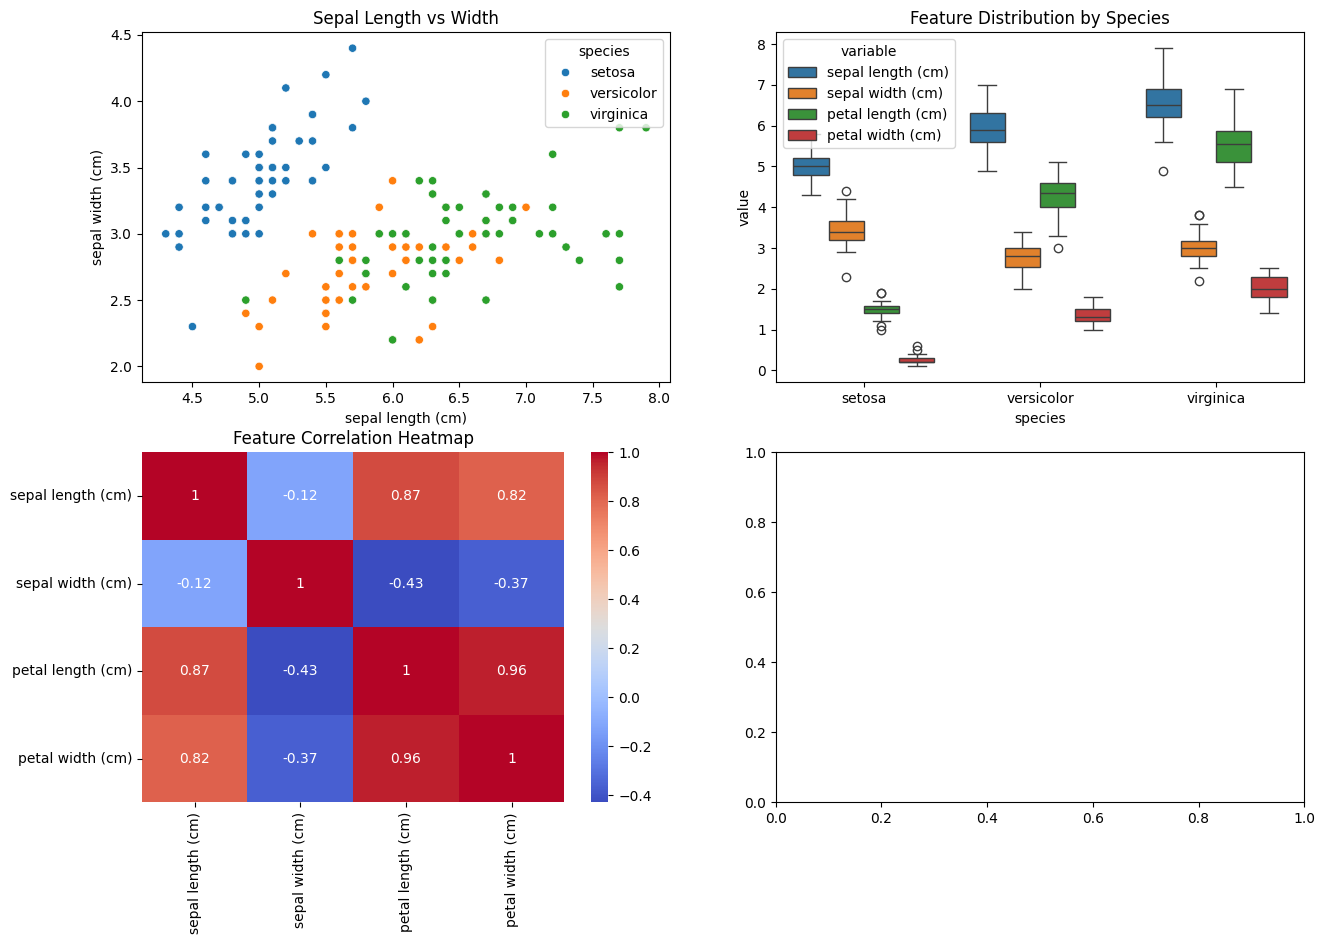

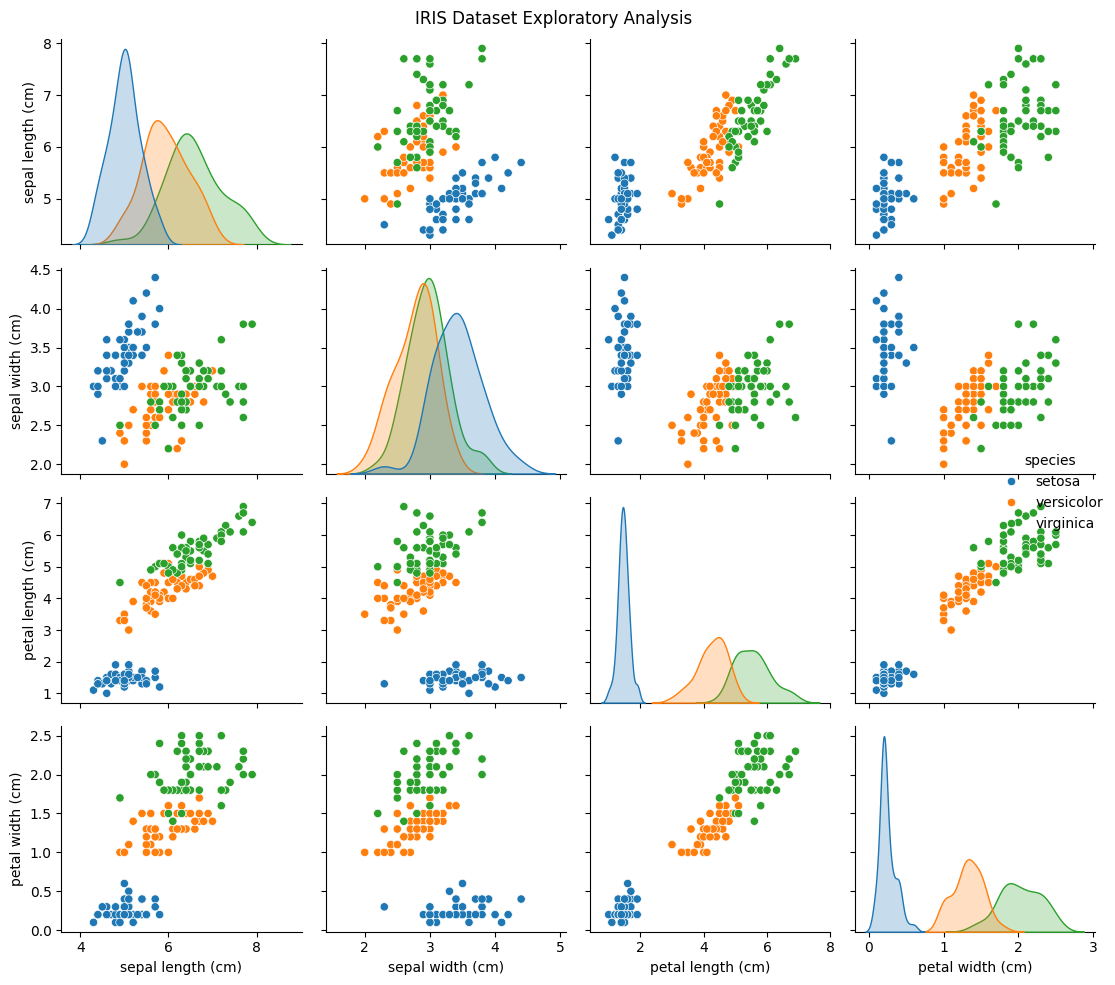

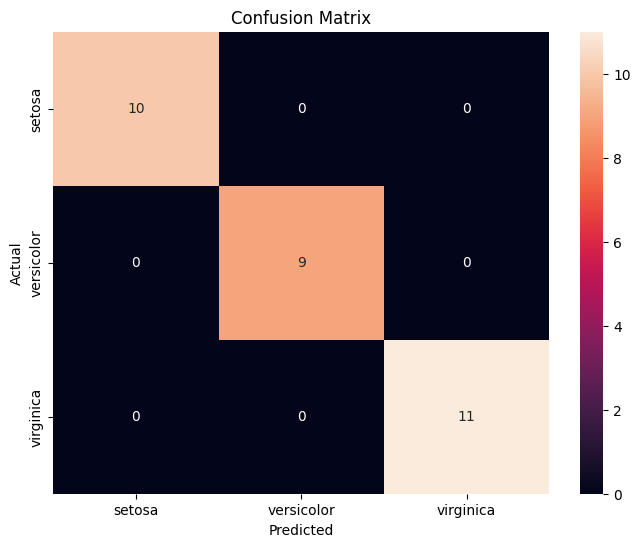

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris # load the iris data set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# sklearn - include the all simple ML functions and simple neuron networks in addition there are data sets like iris.

"""
# pandas - helps us with big data sets the columns - features and the rows - the number of the observation.
it help us to make any manipulations about the matrix (data sets) . like : put any row of the matrix , put some 
rows change the all zero values 
# seaborn and matplotlib - grapics labraries 
"""

# Load Iris Dataset
iris = load_iris() # load the iris data set to a "iris" variable (2D array) num. rows - the num. of the flowers num. columns - kinds of leaves (features)
X, y = iris.data, iris.target # x- the all features , y = the target variable (1D array)
feature_names = iris.feature_names # name for each features columns 
target_names = iris.target_names # name for the target columns

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names) # converts the arrays of the data to data frame when the rows are the data of X and the col. are the names
df['species'] = pd.Categorical.from_codes(y, target_names) # creat species col. that it's rows are the names of the species

# Exploratory Data Analysis
plt.figure(figsize=(15, 10)) # creates any figure but now we don't tell which figure

# 1. Scatter Plot Matrix
plt.subplot(2, 2, 1) 
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species') # make scatter plot from the data (df)
plt.title('Sepal Length vs Width') 

"""
# subplot - Divides the figure into a 2x2 grid (2 rows, 2 columns).
Selects the first cell (top-left) for the next plot.
Cell numbering starts at 1 and progresses row-wise (left-to-right, top-to-bottom).
hue='species' - every spices get a diffrent color

"""

# 2. Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(data=df.melt(id_vars='species'), x='species', y='value', hue='variable')
plt.title('Feature Distribution by Species')

# 3. Correlation Heatmap
plt.subplot(2, 2, 3)
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

"""
plt.subplot(2, 2, 3)
iloc - index location (slice) -{ [:, } - take the all rows , { , :-1] } - take the all columns except for the last columns (the y)
annot=True 
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

"""

# 4. Pairplot
plt.subplot(2, 2, 4)
sns.pairplot(df, hue='species')
plt.suptitle('IRIS Dataset Exploratory Analysis')
plt.tight_layout()

# Machine Learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify=y)

"""
train_test_split - in this line we take the all data of 150 observations that include 50 observations for each spieces. 

the X and the y it divide to train and to test

test_size=0.2 - takes 20% from the data to test

stratify=y -The function will ensure that the relative representation of the classes in y is preserved
in the training data (y_train) and the test data (y_test).

"""

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

"""
scaler = StandardScaler()
1. In this line, we create an object of type StandardScaler from the sklearn library.
2. The purpose of StandardScaler is to standardize the data so that the values of each feature have a mean of 0 and a standard deviation of 1.
3. This step is important when using models that are sensitive to differences in feature scales, such as logistic regression, SVMs, and neural networks.

X_train_scaled = scaler.fit_transform(X_train)
1. Fitthe StandardScaler to the training data (X_train). This means the function calculates the mean and standard deviation
for each feature in the data.
2. Transform (transform) the data so that it becomes standardized according to the calculated mean and standard deviation.
3. the output is a standardized version of X_train, stored in X_train_scaled.

X_test_scaled = scaler.transform(X_test)
1. In this line, we transform (transform) the test data (X_test) using the same mean and standard deviation
values calculated from the training data (X_train).
2. It is critical to use the same values to avoid "data leakage" from the test set into the training set.

"""

# Neural Network Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp.predict(X_test_scaled)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()